In [162]:
import pandas as pd
import matplotlib.pyplot as plt


# Tweets associated with each company

In [175]:
tweets1 = pd.read_csv('twcs.csv',encoding='utf-8')


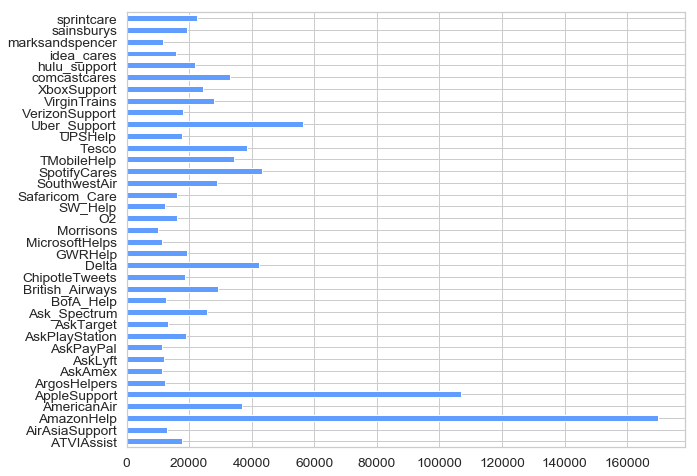

In [177]:
count = tweets1.groupby("author_id")['text'].count()
c = count[count>10000].plot(kind='barh',figsize=(10, 8), color='#619CFF', zorder=2)
c.set_ylabel('')
plt.show()

Likewise, we can do analysis based on each company- Uber,Apple,Chipotle etc.

In [120]:
using LDA


# Tweet Preprocessing steps

In [121]:
tweets = pd.read_csv('twcs.csv',encoding='utf-8')
tweets=tweets[tweets.inbound]
papers=tweets.drop(['tweet_id','author_id','inbound','created_at','response_tweet_id','in_response_to_tweet_id'],axis='columns')
papers.head()

,text
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
4,@sprintcare I did.
6,@sprintcare is the worst customer service
8,@sprintcare You gonna magically change your co...


In [122]:
# Load the regular expression library
import re
# Remove punctuation
papers['text_processed'] = papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['text_processed'] = papers['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers.head()

,text,text_processed
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...
4,@sprintcare I did.,@sprintcare i did
6,@sprintcare is the worst customer service,@sprintcare is the worst customer service
8,@sprintcare You gonna magically change your co...,@sprintcare you gonna magically change your co...


In [123]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sony\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [127]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

papers["text_wo_stop"] = papers["text_processed"].apply(lambda text: remove_stopwords(text))
papers.head()

,text,text_processed,text_wo_stop
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,@sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,@sprintcare sent several private messages one ...
4,@sprintcare I did.,@sprintcare i did,@sprintcare
6,@sprintcare is the worst customer service,@sprintcare is the worst customer service,@sprintcare worst customer service
8,@sprintcare You gonna magically change your co...,@sprintcare you gonna magically change your co...,@sprintcare gonna magically change connectivit...


# Analysing all tweets irrespective of the nature of sentiment

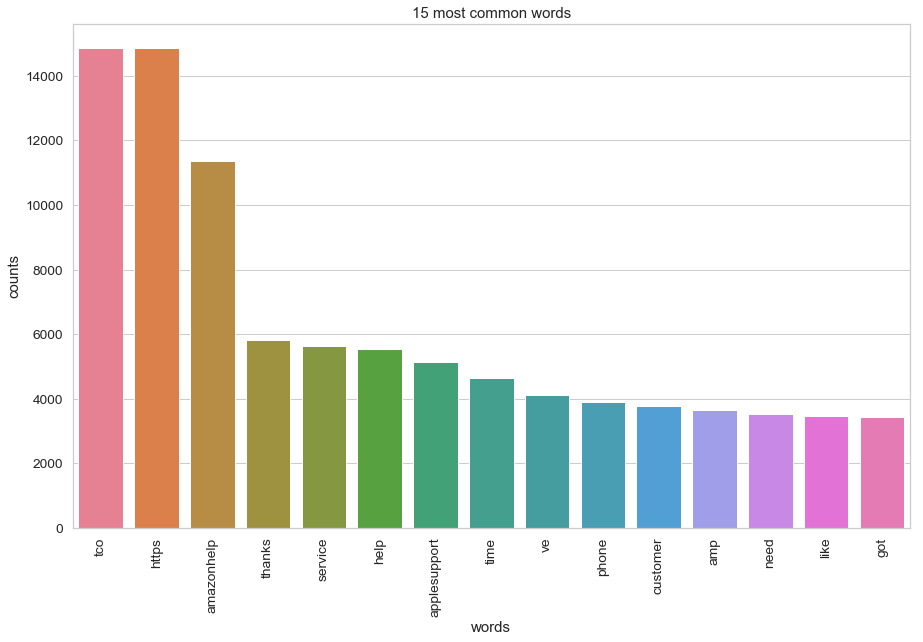

In [145]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
#     words[0],counts[0]="",0
#     words[1],counts[1]="",0
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='15 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['text_wo_stop'][:100000])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [146]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 3
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


Topics found via LDA:

Topic #0:
https tco amazonhelp

Topic #1:
tco https virgintrains

Topic #2:
amazonhelp order uber_support

Topic #3:
applesupport update xboxsupport

Topic #4:
thanks https tco


In [ ]:
#papers['text_wo_stop'].head()

In [147]:
from textblob import TextBlob    
def analyze_sentiment(tweet):
        analysis = TextBlob(tweet)

        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1


In [148]:
#papers['sentiment'] = np.array([analyze_sentiment(tweet) for tweet in papers['text_wo_stop']])
papers['sentiment'] = ([analyze_sentiment(tweet) for tweet in papers['text_wo_stop']])


In [156]:
papers['sentiment'].value_counts()

 0    694766
 1    495935
-1    347142
Name: sentiment, dtype: int64

In [157]:
print("The number of customers who are unhappy : 347,142 ")

The number of customers who are unhappy : 347,142 


# Analysing only the negative tweets to know the reason behind customer dissatisfaction

In [158]:
neg_papers=papers[papers['sentiment']<0]
neg_papers.head()

,text,text_processed,text_wo_stop,sentiment
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,@sprintcare sent several private messages one ...,-1
6,@sprintcare is the worst customer service,@sprintcare is the worst customer service,@sprintcare worst customer service,-1
23,actually that's a broken link you sent me and ...,actually that's a broken link you sent me and ...,actually that's broken link sent incorrect inf...,-1
31,somebody from @VerizonSupport please help meee...,somebody from @verizonsupport please help meee...,somebody @verizonsupport please help meeeeee 😩...,-1
39,@115722 MD. And this was sent to the wrong add...,@115722 md and this was sent to the wrong addr...,@115722 md sent wrong address https://tco/dmq1...,-1


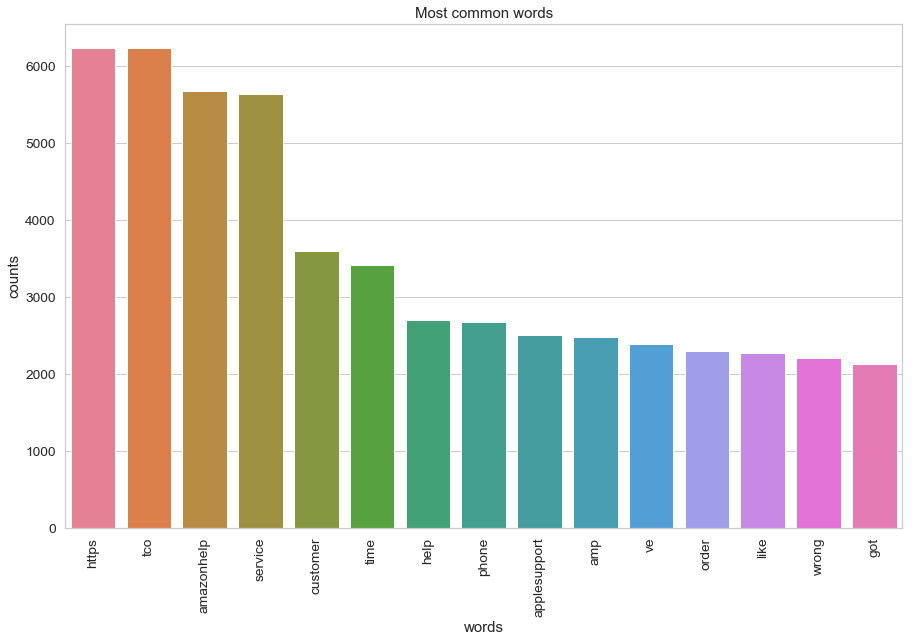

In [160]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='Most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(neg_papers['text_wo_stop'][:50000])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [161]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 3
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


Topics found via LDA:

Topic #0:
americanair delta flight

Topic #1:
amazonhelp wrong late

Topic #2:
service customer account

Topic #3:
applesupport game tco

Topic #4:
amazonhelp tco https
